In [150]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("./results/pruneSensitivity.csv")
print(df)
trueValue=pd.read_csv("./results/PruneTrue.csv")

                             model     time    value   c  d
0    soga_clinicaltrial_k=0.00725c   30.229  0.74395  45  5
1       soga_clickgraph_k=0.00725c   55.139  0.62776  35  6
2       soga_radarquery_k=0.00725c    2.256  6.03943  12  8
3        soga_bernoulli_k=0.00725c    0.304  0.25689  15  2
4      soga_clinicaltrial_k=0.015c   49.722  0.73963  89  5
5         soga_clickgraph_k=0.015c  110.999  0.59750  69  6
6         soga_radarquery_k=0.015c    3.771  5.75695  15  8
7          soga_bernoulli_k=0.015c    0.562  0.25690  30  2
8   soga_clinicaltrial_k=0.003625c    7.760  0.80058  23  5
9      soga_clickgraph_k=0.003625c   31.689  0.61545  18  6
10     soga_radarquery_k=0.003625c    1.259  5.70399   6  8
11      soga_bernoulli_k=0.003625c    0.179  0.25683   8  2


In [28]:
#print(list(set(df["model"])))
models=list(set(list(map(lambda x:x.split("_k=")[0],list(set(df["model"]))))))

In [55]:
for m in trueValue["model"].to_string(index=False).split("\n"):
    m=m.strip()
    gt=trueValue[trueValue["model"]==m]
    gt=gt["value"].iloc[0]
    g=df[df['model'].str.contains(m)].sort_values(by='model', ascending=False)
    #print(g)
    res=g.apply(lambda x:f"{x[1]:02.2f} & {abs(gt-float(x[2]))*100/gt:02.2f}",axis=1)
    print(f"& ".join(res.to_string(index=False).split("\n"))+f"\\\\ {m}")

Series([], )\\ bernoulli
Series([], )\\ clickgraph
Series([], )\\ clinicaltrial
Series([], )\\ normalmixtures
Series([], )\\ radarquery


/var/folders/th/tzthw0195kn8qkczx48fv6440000gn/T/ipykernel_57016/2452805745.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res=g.apply(lambda x:f"{x[1]:02.2f} & {abs(gt-float(x[2]))*100/gt:02.2f}",axis=1)
/var/folders/th/tzthw0195kn8qkczx48fv6440000gn/T/ipykernel_57016/2452805745.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res=g.apply(lambda x:f"{x[1]:02.2f} & {abs(gt-float(x[2]))*100/gt:02.2f}",axis=1)
/var/folders/th/tzthw0195kn8qkczx48fv6440000gn/T/ipykernel_57016/2452805745.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

## Table2 Script

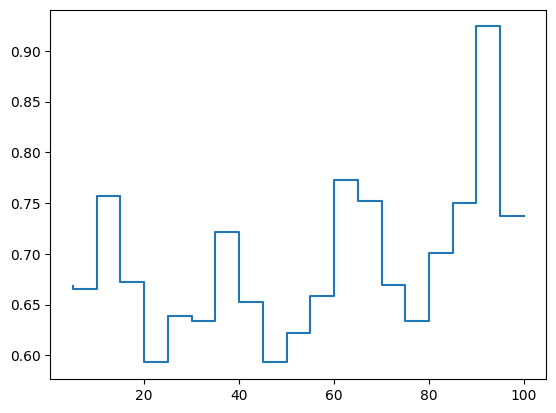

In [157]:
pd.options.display.max_colwidth = 100
df=pd.read_csv("./results/varSensitivity.csv",names=["model","soga_time","soga_value","c","#vars"],header=None).sort_values(by='#vars', ascending=True)

In [148]:
res=df.apply(lambda x:f"\textsl{{{x[0]}}}_{{{x[4]}}} & {x[4]} & {np.round(x[1],2):.2f} & {np.round(x[2],3):.3f} & {np.round(float(x[5]),2):.2f} & {np.round(x[6],3):.3f} &{np.round(np.abs(x[2]-x[6])*100/x[6],2)} \\\\",axis=1)
print("\n".join(res.to_string(index=False).split("\n")))

IndexError: index 5 is out of bounds for axis 0 with size 5

## Table3 Script

In [41]:
pd.options.display.max_colwidth = 1000
df=pd.read_csv("./results/branchSensitivity.csv").sort_values(by=["model","c"], ascending=True)

In [79]:
#df.apply(lambda x:f"%s & {x[3]} & "%(x[0].replace(re.findall(r"[a-z]*(\d+.*)",x[0])[0],"")),axis=1)
df_cont=df[(df["model"].str.contains("continuous")) & (df["model"].str.contains("soga")) & (df["model"].str.contains("randomwalk"))].sort_values(by=["c"], ascending=True)
print(df_cont)
#df_cont["#B"]=df_cont["model"].apply(lambda x:re.findall(r"[a-zA-Z]+(\d+).*",x)[0])
df_cont["model"]=df_cont["model"].apply(lambda x:re.findall(r"([a-zA-Z]+)\d+.*",x)[0])
df_disc=df[df["model"].str.contains("discrete")].sort_values(by=["c"], ascending=True)
df_disc["#B"]=df_disc["model"].apply(lambda x:re.findall(r"[a-zA-Z]+(\d+).*",x)[0])
df_disc["model"]=df_disc["model"].apply(lambda x:re.findall(r"([a-zA-Z]+)\d+.*",x)[0])
df_cont=df_cont.set_index(pd.Index(range(8)))
df_disc=df_disc.set_index(pd.Index(range(8)))
res=pd.concat([df_cont,df_disc],axis=1,join="inner")

Empty DataFrame
Columns: [model, soga_time, soga_value, c, #vars, pymc_time, pymc_value]
Index: []


ValueError: Length mismatch: Expected 0 rows, received array of length 8

In [39]:
df

,model,time,value,c,d
66,psi_bernoulli11_continuous,3.618854,0.307692,NaN,NaN
50,psi_bernoulli11_discrete,4.597262,0.750000,NaN,NaN
69,psi_bernoulli13_continuous,3.785758,0.333333,NaN,NaN
53,psi_bernoulli13_discrete,5.096273,0.750000,NaN,NaN
76,psi_bernoulli15_continuous,3.820925,0.352941,NaN,NaN
...,...,...,...,...,...
19,soga_surveyunbias5_discrete,1.411000,NaN,1.0,4.0
30,soga_surveyunbias7_continuous,4.598000,NaN,511.0,4.0
7,soga_surveyunbias7_discrete,1.870000,NaN,1.0,4.0
27,soga_surveyunbias9_continuous,10.455000,NaN,1948.0,4.0


In [306]:
res2=res.apply(lambda x:f"{x[0]}_{{{x.name+1}}} & {np.round(x[1],2):.2f} & {np.round(x[8],2):.2f} & {int(x[10])} & {int(int(x[14]))} \\\\",axis=1)
print(res2.to_string(index=False))

      randomwalk_{1} & 0.01 & 0.00 & 2 & 1 \\
      randomwalk_{2} & 0.01 & 0.01 & 8 & 3 \\
     randomwalk_{3} & 0.03 & 0.01 & 32 & 5 \\
    randomwalk_{4} & 0.12 & 0.02 & 128 & 7 \\
    randomwalk_{5} & 0.55 & 0.07 & 512 & 9 \\
  randomwalk_{6} & 1.65 & 0.29 & 2048 & 11 \\
  randomwalk_{7} & 5.76 & 0.98 & 8192 & 13 \\
randomwalk_{8} & 22.27 & 3.66 & 32768 & 15 \\


/var/folders/th/tzthw0195kn8qkczx48fv6440000gn/T/ipykernel_55793/4033885654.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res2=res.apply(lambda x:f"{x[0]}_{{{x.name+1}}} & {np.round(x[1],2):.2f} & {np.round(x[8],2):.2f} & {int(x[10])} & {int(int(x[14]))} \\\\",axis=1)


## Table4 Script

In [69]:
df=pd.read_csv("./results/cmpSensitivity_soga.csv").sort_values(by=["model","c"], ascending=True)
df_true=pd.read_csv("./results/cmpSensitivity_true.csv").sort_values(by=["model"], ascending=True)

In [80]:
data=df[~df["model"].str.contains("radarquery")]
data_tru=df_true[~df_true["model"].str.contains("radarquery")]

In [120]:
for m in data_tru["model"]:
   print(m)
   gt=float(data_tru[data_tru["model"]==m].iloc[0]["value"])
   e=abs((np.array(list(map(float,data[data["model"].str.contains(m)]["value"].to_numpy())))-gt))*100/gt
   print(np.round(e,2))

coinbias
[2.73 2.19 0.1  0.02]
surveyunbias
[0.32 0.06 0.02 0.01]
